<img src="images/small_images.jpg" style="width:850px;height:600px;">

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape   

(10000, 32, 32, 3)

##### Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:50]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0]], dtype=uint8)

##### y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

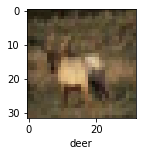

In [ ]:
plot_sample(X_train, y_train, 3)

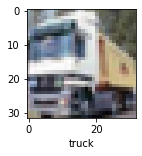

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

### Normalizing the training data

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 89s 56ms/step - loss: 1.8107 - accuracy: 0.3563
Epoch 2/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.6201 - accuracy: 0.4292
Epoch 3/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.5393 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 82s 52ms/step - loss: 1.4785 - accuracy: 0.4816
Epoch 5/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.4288 - accuracy: 0.4980


In [ ]:
y_pred=ann.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 20ms/step


array([[0.31204817, 0.48341012, 0.69349027, 0.92512286, 0.4874879 ,
        0.81403923, 0.8258061 , 0.04120064, 0.6220263 , 0.13241076],
       [0.8553832 , 0.9199748 , 0.3105165 , 0.23525131, 0.14410824,
        0.1115515 , 0.04404804, 0.16192219, 0.96571314, 0.98985726],
       [0.9460851 , 0.85861343, 0.41315004, 0.23692055, 0.20141615,
        0.15882446, 0.01304177, 0.16832182, 0.97213835, 0.9380456 ],
       [0.86386365, 0.4437465 , 0.7230054 , 0.42156103, 0.49256128,
        0.34409925, 0.04248784, 0.4164341 , 0.92035353, 0.52756274],
       [0.1380847 , 0.04589659, 0.84032434, 0.70771396, 0.97058964,
        0.7140808 , 0.91816926, 0.39674166, 0.27762794, 0.04220056]],
      dtype=float32)

### You can see that at the end of 5 epochs, accuracy is at around 48.48%

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 21ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.39      0.49      1000
           1       0.71      0.43      0.53      1000
           2       0.34      0.42      0.37      1000
           3       0.37      0.32      0.34      1000
           4       0.42      0.39      0.41      1000
           5       0.47      0.29      0.36      1000
           6       0.39      0.70      0.50      1000
           7       0.66      0.43      0.52      1000
           8       0.52      0.74      0.61      1000
           9       0.51      0.64      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000

